<h2>We gaan een eigen ijskristal maken:</h2>

<p>Zoek op het internet plaatjes van ijskristallen zodat je weet hoe deze er uit zien.</p>

<p>Start het elm programma <a href="http://goloca.org:443/examples/ijskristal.elm">ijskristal.elm</a>. Je ziet het volgende:</p>

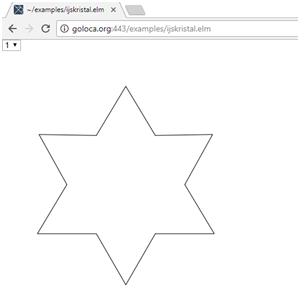

<p>Links boven kun je selecteren hoeveel maal het ijskristal verdeeld moet worden. Selecteer daar 4. Je ziet het volgende:</p>

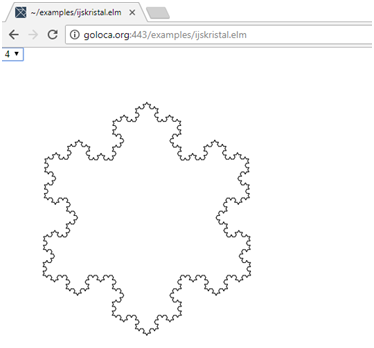

<h2>Hoe gaan we een ijskrinstallen maken</h2> 

<p>In de cell hieronder staat het bestand <strong>myijskristallen.elm</strong>. Deze&nbsp; code staat in het view model daarvan.</p>

<p>&nbsp; &nbsp; &nbsp;&nbsp; path =</p>

<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; [ koch startP1 startP2 model.passes []</p>

<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; , koch startP2 startP3 model.passes []</p>

<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; , koch startP3 startP1 model.passes []</p>

<p>&nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; ]</p>

<p>In deze regel worden de punten voor de tekening in een lijst gezet&shy;&shy;&shy;. Dit gebeurt door 3 lijnen te bepalen en deze verder te bewerken zoals je hier ziet:</p>

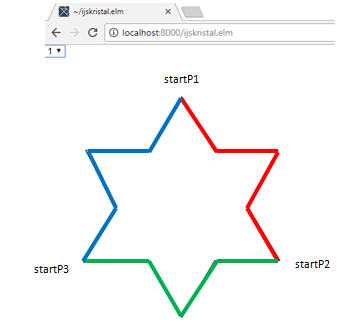

<p>Daarvoor wordt de functie <strong>koch</strong> aangeroepen met als parameters:</p>

<ul>
	<li>Het startpunt van de lijn</li>
	<li>Het eindpunt van de lijn</li>
	<li>Het aantal stappen waarin de lijn bewerkt wordt</li>
	<li>De lijst van punten die tot en met deze stap bepaald zijn</li>
</ul>

<p>In <strong>kock</strong> worden de drie nieuwe punten <strong>p1</strong>, <strong>p2</strong> en <strong>p3</strong> berekend om de lijn kunnen te tekenen.</p>

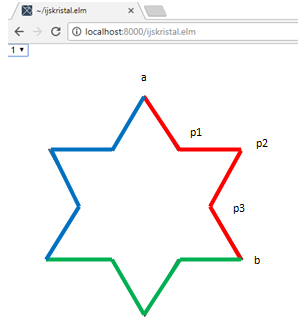

<p>Het begin en het eind punt heten binnen <strong>koch</strong> <strong>a</strong> en <strong>b</strong>. Het begin en eindpunt worden als parameters meegegeven.</p>

<p>Als het aantal stappen niet meer dan 1 is geeft de functie <strong>koch</strong> het volgende terug:</p>

<p>a :: p1 :: p2 :: p3 :: b :: points</p>

<p>Als het aantal stappen meer dan 1 is roept roep de functie <strong>koch</strong> zichzelf 4 keer aan met als te bewerken lijnen:</p>

<ul>
	<li>De lijn tussen de punten <strong>a</strong> en <strong>p1</strong></li>
	<li>De lijn tussen de puntern <strong>p1</strong> en <strong>p2</strong></li>
	<li>De lijn tussen de punten <strong>p2</strong> en <strong>p3</strong></li>
	<li>De lijn tussen de punten <strong>p3 </strong>en <strong>b</strong></li>
</ul>

<p>Bij deze aanroepen verlaagt <strong>koch</strong> het aantal stappen met 1. Alle resulterende lijsten van deze 4 aanroepen zet <strong>koch</strong> in een gezamenlijke lijst en geeft deze terug.</p>

<h2>Opdracht</h2>
<p>Maak je eigen ijskristal door de code van <strong>ijskristallen.elm</strong> in de volgende cell aan te passen.</p>

In [1]:
module Main exposing (..)

import Html exposing (div, select, option, text)
import Html.Attributes exposing (..)
import Html.Events exposing (onInput)
import Collage
import Element
import Color
import Result


main : Program Never Model Msg
main =
    Html.program
        { init = init
        , view = view
        , update = update
        , subscriptions = subscriptions
        }


subscriptions : Model -> Sub msg
subscriptions model =
    Sub.none


type alias Model =
    { passes : Int
    }
    
init : ( Model, Cmd msg )
init =
    ( { passes = 1 }, Cmd.none )


update : Msg -> Model -> ( Model, Cmd msg )
update msg model =
    case msg of
        PassesChange passes ->
            let
                intPasses =
                    String.toInt passes |> Result.withDefault 1
            in
                ( { passes = intPasses }, Cmd.none )


type alias Point =
    { x : Float
    , y : Float
    }

koch : Point -> Point -> Int -> List Point -> List Point
koch a b limit points =
    let
        ( dx, dy ) =
            ( b.x - a.x, b.y - a.y )

        dist =
            dx * dx + dy * dy |> sqrt

        unit =
            dist / 3

        angle =
            atan2 dy dx

        p1 =
            Point (a.x + dx / 3) (a.y + dy / 3)

        p2 =
            Point
                (p1.x
                    + (cos (angle - pi / 3))
                    * unit
                )
                (p1.y
                    + (sin (angle - pi / 3))
                    * unit
                )
                
       p3 =
            Point (b.x - dx / 3) (b.y - dy / 3)
    in
        if limit > 1 then
            let
                l =
                    limit - 1
            in
                List.concat
                    [ points
                    , koch a p1 l points
                    , koch p1 p2 l points
                    , koch p2 p3 l points
                    , koch p3 b l points
                    ]
        else
            a :: p1 :: p2 :: p3 :: b :: points

startP2 : Point
startP2 =
    Point 150 100


startP3 : Point
startP3 =
    Point -150 100


screenWidth : Int
screenWidth =
    420


screenHeight : Int
screenHeight =
    420


toElmCoordinates : Point -> ( Float, Float )
toElmCoordinates { x, y } =
    ( x
    , y * -1
    )

renderOptions : List (Html.Html msg)
renderOptions =
    List.range 1 7
        |> List.map toString
        |> List.map (\x -> option [ value x ] [ text x ])


view : Model -> Html.Html Msg
view model =
    let
        path =
            [ koch startP1 startP2 model.passes []
            , koch startP2 startP3 model.passes []
            , koch startP3 startP1 model.passes []
            ]
            |> List.concat
            |> List.map toElmCoordinates
            |> Collage.path
            |> Collage.traced (Collage.solid Color.black)
    in
        div []
            [ select [ onInput PassesChange ] renderOptions
            , Collage.collage screenWidth screenHeight [ path ] |> Element.toHtml
            ]    

-- compile-code

I cannot find module 'Collage'.

Module 'Main' is trying to import it.

Potential problems could be:
 * Misspelled the module name
 * Need to add a source directory or new dependency to elm-package.json